# **Lab 1 - Kenza Bouqdir**

# **1: Text Processing and Minimum Edit Distance**

## **1. Setup and Imports**

In [1]:
# Importing required libraries
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
import pandas as pd

In [2]:
# Downloading required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **2. Text Extraction**

In [3]:
# URL for the Wikipedia article
url = "https://en.wikipedia.org/wiki/Natural_language_processing"

# Fetch the webpage content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract main article text (excluding references, navigation, etc.)
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.get_text() + "\n"

# Save the extracted text to a file
with open('nlp_wiki.txt', 'w', encoding='utf-8') as f:
    f.write(text)

print("Text has been successfully extracted and saved to 'nlp_wiki.txt'")

Text has been successfully extracted and saved to 'nlp_wiki.txt'


## **3. Token Processing and Frequency Analysis**

In [4]:
# Tokenize and remove stopwords
tokens = word_tokenize(text.lower())
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words ]

#calc token frequencies
token_freq= {}
for token in filtered_tokens:
    token_freq[token] = token_freq.get(token, 0) +1

#sort tokens by freq
sorted_tokens = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)

#sort token by freq in a file
with open('token_freq.txt', 'w', encoding='utf-8') as f:
    for token, freq in sorted_tokens:
        f.write(f"{token}: {freq}\n")

most_freq_words = sorted_tokens[0][0]#find most freq non stop words

#extract sentences containing the most frequnt words
sentences = sent_tokenize(text)
freq_word_sentences = [
    sent for sent in sentences if most_freq_words in sent.lower()
]

**Finding Sentences Using UNIX Commands * UNIX Command for Sentence Extraction**

The following UNIX command can be used to find sentences containing our most frequent word:
```bash
grep -i 'language' nlp_wiki.txt

Options used:

    -i: Makes the search case-insensitive   
    Pattern: Searches for the most frequent word
    File: Searches in our extracted text file

Note: For Windows users, alternatives include:

    PowerShell: Select-String -Path "nlp_wiki.txt" -Pattern "language" -CaseSensitive:$false
    CMD: findstr /i "language" nlp_wiki.txt

## **4. Stemming and Lemmatization Analysis**

In [5]:
# Initialize stemmers and lemmatizer
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

example_words = ['understanding', 'using', 'language']
print("Stemming and Lemmatization Examples:")
print("\nPorter Stemmer: ")
for word in example_words:
    print(f"{word}: {porter_stemmer.stem(word)}")

print("\nLancaster Stemmer: ")
for word in example_words:
    print(f"{word}: {lancaster_stemmer.stem(word)}")

print("\nLemmatization:")
for word in example_words:
    print(f"{word}: {lemmatizer.lemmatize(word)}")


Stemming and Lemmatization Examples:

Porter Stemmer: 
understanding: understand
using: use
language: languag

Lancaster Stemmer: 
understanding: understand
using: us
language: langu

Lemmatization:
understanding: understanding
using: using
language: language


**Stemming and Lemmatization Discussion**

**Porter vs Lancaster Stemmers**
The examples above demonstrate key differences between the stemmers:

*Porter Stemmer (More Conservative)*
- Produces more readable stems
- Maintains more of the original word structure
- Better for text that needs to remain somewhat readable
- Example: 'language' → 'languag'

*Lancaster Stemmer (More Aggressive)*
- Creates shorter stems
- Sometimes overstems words
- Can make stems harder to interpret
- Example: 'language' → 'langu'
- Example: 'using' → 'us'

**When to Use Each Approach**

Lemmatization is Better For:
- Tasks requiring grammatically correct words
- Machine translation
- Text generation
- Natural language understanding
- When accuracy is more important than speed

Stemming is Better For:
- When processing speed is crucial
- Information retrieval
- Search engines
- Text classification
- Basic text matching tasks

## **5. Minimum Edit Distance Implementation**

In [6]:
def min_edit_distance(str1, str2):
    m, n = len(str1), len(str2)

    dp = [[0] * (n + 1) for _ in range(m + 1)]    # Create a matrix to store results of subproblems

    #fill the first row and column
    for i in range(m+1):
        dp[0][0] = i
    for j in range(n+1):
        dp[0][j] = j

    #fill rest of the matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            if str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j],
                                    dp[i][j-1],
                                    dp[i-1][j-1])
    return dp[m][n]

test_pairs = [
    ("sunday", "saturday"),
    ("AGATGC", "AGTATCT"),
    ("Levenshtein", "Lavenshtein")
]

print("\nMinimum Edit Distance Calculations: ")
for word1, word2 in test_pairs:
    distance = min_edit_distance(word1,word2)
    print(f"Distance betwenn {word1} & {word2} is : {distance}")


Minimum Edit Distance Calculations: 
Distance betwenn sunday & saturday is : 3
Distance betwenn AGATGC & AGTATCT is : 3
Distance betwenn Levenshtein & Lavenshtein is : 1


In [7]:
# Example of using the most frequent word for edit distance
# Intentionally misspell the most frequent word
original_word = "language"
misspelled_word = original_word[:-1] + ('x' if original_word[-1] != 'x' else 'y')

print(f"\nEdit distance between '{original_word}' and '{misspelled_word}': "
      f"{min_edit_distance(original_word, misspelled_word)}")


Edit distance between 'language' and 'languagx': 1


# **2: N-gram model**

In this part, I've implemented an N-gram language model that processes text data and analyzes word sequences. Here's a detailed explanation of each component and the results obtained.

In [8]:
import pandas as pd
import numpy as np
import random
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice

# Question 1: Loading and Preprocessing Data

**Implement loading and preprocessing function**


First, I implemented the load_and_preprocess function to handle text data from the Twitter dataset. This function:
* Reads the input file
* Tokenizes text into words using regex
* Converts all text to lowercase
* Returns a list of tokenized sentences

In [9]:
random.seed(42)

In [10]:
def load_and_preprocess(file_path):
    """
    Loads and preprocesses a text dataset, returning a list of lists
    where each list[i] contains the tokens of sentence at index i.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.readlines()
    sentences = [re.findall(r'\b\w+\b', line.lower()) for line in text if line.strip()]
    return [sent for sent in sentences if sent]

**Load and split the data**

In [11]:
# Load and split data
file_path = 'en_US.twitter.txt'
sentences = load_and_preprocess(file_path)
random.shuffle(sentences)
train_size = int(0.8 * len(sentences))
train_data, test_data = sentences[:train_size], sentences[train_size:]

print("Training Data Sample (first 3 sentences):")
print(train_data[:3])
print("\nTesting Data Sample (first 3 sentences):")
print(test_data[:3])

Training Data Sample (first 3 sentences):
[['i', 'hope', 'this', 'fox', '25th', 'anniversary', 'special', 'mentions', 'the', 'short', 'lived', 'program', 'm', 'a', 'n', 't', 'i', 's'], ['a', 'little', 'oovoo', 'sesh', 'before', 'bed', 'was', 'exactly', 'what', 'i', 'needed'], ['how', 'do', 'i', 'go', 'about', 'getting', 'you', 'to', 'review', 'tweet', 'about', 'my', 'app']]

Testing Data Sample (first 3 sentences):
[['and', 'hard', 'to', 'keep', 'up', 'you', 'all', 'are', 'great', 'thank', 'you'], ['superbad', 'is', 'on'], ['what', 'would', 'you', 'like', 'to', 'hear', 'on', 'future', 'patcast', 's', 'what', 'would', 'you', 'like', 'to', 'see', 'on', 'our', 'blog', 'looking', 'for', 'feedback', 'and', 'ready', 'to', 'make', 'new', 'changes']]


**Sample Output Analysis**

**Training Data Sample**

The first three training sentences demonstrate typical Twitter characteristics

[

    ['i', 'hope', 'this', 'fox', '25th', 'anniversary'...],  # TV/media related

    ['a', 'little', 'oovoo', 'sesh', 'before', 'bed'...],   # Informal language

    ['how', 'do', 'i', 'go', 'about', 'getting'...]         # Question format

]

*Key observations:*

* Mix of formal and informal language ("oovoo", "sesh")
* Numbers and special characters present ("25th")
* Varying sentence lengths
* Common Twitter topics (media, personal updates, questions)

**Testing Data Sample**

[

    ['and', 'hard', 'to', 'keep', 'up'...],    # Casual conversation

    ['superbad', 'is', 'on'],                  # Short status update

    ['what', 'would', 'you', 'like'...]        # Long, structured query
    
]

The testing set shows:
* Diverse sentence lengths (3 to 28 tokens)
* Different types of tweets (statements, questions)
* Typical social media engagement patterns


# Question 2: Vocabulary Processing

**Implement vocabulary functions**

I created three key functions for vocabulary processing:
* compute_word_counts: Counts word frequencies in the corpus
* filter_vocabulary: Creates vocabulary with words appearing above a threshold
* replace_with_UNK: Replaces rare words with <UNK> token

In [12]:
def compute_word_counts(sentences):
    """Returns a dictionary of words with their counts."""
    return dict(Counter(word for sentence in sentences for word in sentence))

def filter_vocabulary(sentences, threshold=2):
    """Returns words that appear more than threshold times."""
    word_counts = compute_word_counts(sentences)
    return {word for word, count in word_counts.items() if count > threshold}

def replace_with_UNK(sentences, vocabulary):
    """Replaces words not in vocabulary with <UNK>."""
    return [[word if word in vocabulary else '<UNK>' for word in sentence] 
            for sentence in sentences]

**Apply vocabulary processing**

In [13]:
# Process vocabulary
vocab = filter_vocabulary(train_data, threshold=2)
processed_train_data = replace_with_UNK(train_data, vocab)
processed_test_data = replace_with_UNK(test_data, vocab)

# Print samples
print("Original training sample:")
print(train_data[:2])
print("\nProcessed training sample (with <UNK>):")
print(processed_train_data[:2])

# Validate word counts
word_counts = compute_word_counts(train_data)
print("\nSample word counts (first 5 words):")
print(list(word_counts.items())[:5])

Original training sample:
[['i', 'hope', 'this', 'fox', '25th', 'anniversary', 'special', 'mentions', 'the', 'short', 'lived', 'program', 'm', 'a', 'n', 't', 'i', 's'], ['a', 'little', 'oovoo', 'sesh', 'before', 'bed', 'was', 'exactly', 'what', 'i', 'needed']]

Processed training sample (with <UNK>):
[['i', 'hope', 'this', 'fox', '25th', 'anniversary', 'special', 'mentions', 'the', 'short', 'lived', 'program', 'm', 'a', 'n', 't', 'i', 's'], ['a', 'little', 'oovoo', 'sesh', 'before', 'bed', 'was', 'exactly', 'what', 'i', 'needed']]

Sample word counts (first 5 words):
[('i', 734637), ('hope', 28487), ('this', 131371), ('fox', 1467), ('25th', 353)]


**Output Analysis**

**Word Frequency Distribution**

The sample word counts reveal interesting patterns:
[

    ('i', 734637),      # Personal pronoun "i" dominates with 734,637 occurrences

    ('hope', 28487),    # Common verb

    ('this', 131371),   # Demonstrative pronoun

    ('fox', 1467),      # Proper nouns like "fox" show moderate frequency (1,467)

    ('25th', 353)       # Specific numbers like "25th" appear relatively rarely (353)

]

**Vocabulary Processing Effect**

Comparing original vs. processed samples:

[
    
    ['i', 'hope', 'this', 'fox', '25th', 'anniversary'...],

    ['a', 'little', 'oovoo', 'sesh', 'before', 'bed'...]
    
]


* Most words in the sample exceeded the threshold (>2)
* Common Twitter vocabulary was preserved
* The vocabulary effectively captures the dataset's language characteristics
* The <UNK> token replacement system is working as intended

This vocabulary processing step successfully prepared our data for n-gram model training by establishing a robust word frequency baseline while maintaining the integrity of common language patterns

# Question 3: N-gram Counting


**Implement n-gram counting function**

The count_ngrams function implements n-gram counting with these features:
* Adds start-of-sentence tokens (<s>)
* Adds end-of-sentence token (<e>)
* Creates n-grams as tuples
* Counts occurrences in a dictionary

In [14]:
def count_ngrams(sentences, n):
    ngram_counts = Counter()
    for sentence in sentences:
        padded_sent = ['<s>'] * (n-1) + sentence + ['<e>']
        for i in range(len(padded_sent) - n + 1):
            ngram = tuple(padded_sent[i:i+n])
            ngram_counts[ngram] += 1
    return dict(ngram_counts)

**Test n-gram counting**

In [15]:
# Test with example sentences
test_sentences = [['i', 'love', 'coding'], ['i', 'love', 'python']]
bigram_counts = count_ngrams(test_sentences, 2)
trigram_counts = count_ngrams(test_sentences, 3)

print("Bigram counts:")
for ngram, count in list(bigram_counts.items())[:5]:
    print(f"{ngram}: {count}")

print("\nTrigram counts:")
for ngram, count in list(trigram_counts.items())[:5]:
    print(f"{ngram}: {count}")

Bigram counts:
('<s>', 'i'): 2
('i', 'love'): 2
('love', 'coding'): 1
('coding', '<e>'): 1
('love', 'python'): 1

Trigram counts:
('<s>', '<s>', 'i'): 2
('<s>', 'i', 'love'): 2
('i', 'love', 'coding'): 1
('love', 'coding', '<e>'): 1
('i', 'love', 'python'): 1


**N-gram Analysis Results Interpretation**

The results show the frequency analysis of bigrams (2-word sequences) and trigrams (3-word sequences) in two similar sentences. Notable observations:

**Bigram Analysis**
* The sequence (('s', 'i')) appears twice, indicating both sentences start with "i"
* ('i', 'love') also appears twice, showing "i love" is a common pattern
* The variations occur in the final words, with "coding" and "python" each appearing once

**Trigram Analysis**
* Similar to bigrams, sentence starts ('s', 's', 'i') appear twice
* The full phrases "i love coding" and "i love python" each appear once as trigrams
* The analysis uses 's' as sentence start marker and 'e' as end marker

This indicates a consistent sentence structure with variation only in the final word.

# Question 4: Count Table Generation

**Implement count table generation**

I implemented the generate_count_table function to create transition count matrices. The function:
* Handles special tokens (<s>, <e>, <UNK>)
* Creates a pandas DataFrame for counts
* Maps n-grams to rows and vocabulary to columns

In [16]:
def generate_count_table(ngram_plus1_occurrences, lexicon):
    if not ngram_plus1_occurrences:
        raise ValueError("ngram_plus1_occurrences cannot be empty")
    if not lexicon:
        raise ValueError("lexicon cannot be empty")

    # Add special tokens to lexicon
    full_lexicon = list(set(lexicon) | {'<e>', '<UNK>', '<s>'})
    
    # Extract n-grams (contexts) from (n+1)-grams
    ngrams = set(ngram[:-1] for ngram in ngram_plus1_occurrences.keys())
    
    # Create index labels, flattening single-element tuples
    index_labels = [ngram[0] if len(ngram) == 1 else ngram for ngram in ngrams]
    
    # Initialize count table with zeros
    count_table = pd.DataFrame(0,
                             index=index_labels,
                             columns=full_lexicon)
    
    # Fill in the counts
    for ngram_plus1, count in ngram_plus1_occurrences.items():
        context, next_word = ngram_plus1[:-1], ngram_plus1[-1]
        # Flatten context if it's a single-element tuple
        if len(context) == 1:
            context = context[0]
        count_table.loc[context, next_word] = count
    
    return count_table

**Test with an example**

In [17]:
phrases = [['i', 'love', 'my', 'dog'], ['this', 'cat', 'is', 'so', 'cute']]
word_list = list(set(word for phrase in phrases for word in phrase))
bigram_occurrences = count_ngrams(phrases, 2)
count_table = generate_count_table(bigram_occurrences, word_list)

print("Count Table for Example Phrases:")
print(count_table)

Count Table for Example Phrases:
      cat  is  dog  my  so  <UNK>  <e>  this  <s>  love  cute  i
cat     0   1    0   0   0      0    0     0    0     0     0  0
this    1   0    0   0   0      0    0     0    0     0     0  0
i       0   0    0   0   0      0    0     0    0     1     0  0
so      0   0    0   0   0      0    0     0    0     0     1  0
cute    0   0    0   0   0      0    1     0    0     0     0  0
<s>     0   0    0   0   0      0    0     1    0     0     0  1
dog     0   0    0   0   0      0    1     0    0     0     0  0
love    0   0    0   1   0      0    0     0    0     0     0  0
is      0   0    0   0   1      0    0     0    0     0     0  0
my      0   0    1   0   0      0    0     0    0     0     0  0


**Bigram Count Table Analysis**

This table represents a frequency matrix for word transitions (bigrams) in the given phrases:
- "i love my dog"
- "this cat is so cute"

**Table Structure**
- Rows represent the first word of each bigram (current word)
- Columns represent the second word (next word)
- Values show how many times each transition occurs
- Special tokens: '<'s'>' (sentence start), '<'e'>' (sentence end), '<'UNK'>' (unknown words)

**Key Transitions Observed**
1. From sentence start ('<'s'>'):
   - '<'s'>' → 'i' (1 time)
   - '<'s'>' → 'this' (1 time)

2. Word chains:
   - 'i' → 'love' (1 time)
   - 'love' → 'my' (1 time)
   - 'my' → 'dog' (1 time)
   - 'this' → 'cat' (1 time)
   - 'cat' → 'is' (1 time)
   - 'is' → 'so' (1 time)
   - 'so' → 'cute' (1 time)

3. Sentence endings:
   - 'dog' → '<'e'>' (1 time)
   - 'cute' → '<'e'>' (1 time)

This matrix effectively captures all word-to-word transitions in both sentences, showing how each word connects to the next one.

# Question 5: Probability Table Computation

**Implement probability table computation**

The final step was implementing compute_probability_table with Laplace smoothing:
* Applies smoothing factor to all counts
* Normalizes rows to create valid probability distributions
* Handles edge cases properly

In [18]:
def compute_probability_table(ngram_plus1_counts, lexicon, smoothing_factor=1.0):
    # Get count table
    count_table = generate_count_table(ngram_plus1_counts, lexicon)
    
    # Apply Laplace smoothing
    smoothed_counts = count_table + smoothing_factor
    
    # Normalize rows to get probabilities
    probability_table = smoothed_counts.div(smoothed_counts.sum(axis=1), axis=0)
    
    return probability_table

**Test probability table computation**


In [19]:
prob_table = compute_probability_table(bigram_occurrences, word_list)
print("\nProbability Table:")
print(prob_table)
print("\nRow sums (should be 1.0):", prob_table.sum(axis=1))


Probability Table:
           cat        is       dog        my        so     <UNK>       <e>  \
cat   0.076923  0.153846  0.076923  0.076923  0.076923  0.076923  0.076923   
this  0.153846  0.076923  0.076923  0.076923  0.076923  0.076923  0.076923   
i     0.076923  0.076923  0.076923  0.076923  0.076923  0.076923  0.076923   
so    0.076923  0.076923  0.076923  0.076923  0.076923  0.076923  0.076923   
cute  0.076923  0.076923  0.076923  0.076923  0.076923  0.076923  0.153846   
<s>   0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
dog   0.076923  0.076923  0.076923  0.076923  0.076923  0.076923  0.153846   
love  0.076923  0.076923  0.076923  0.153846  0.076923  0.076923  0.076923   
is    0.076923  0.076923  0.076923  0.076923  0.153846  0.076923  0.076923   
my    0.076923  0.076923  0.153846  0.076923  0.076923  0.076923  0.076923   

          this       <s>      love      cute         i  
cat   0.076923  0.076923  0.076923  0.076923  0.076923  
this  0

**Bigram Probability Table Analysis**

*Overview*
This table shows the transition probabilities between words after applying Laplace smoothing (with smoothing_factor=1.0). It represents the probability of seeing each word (columns) given the previous word (rows).

*Key Observations*

**Smoothing Effects**
- The table uses Laplace smoothing, which adds 1 to all counts to handle unseen transitions
- Base probability for most transitions is 0.076923 (1/13), representing the smoothed probability
- Row sums equal 1.0, confirming proper probability distribution

**Notable High Probability Transitions**
1. Starting probabilities (from '<'s'>'):
   - P('<'s'>' → 'i') = 0.142857
   - P('<'s'>' → 'this') = 0.142857
   
2. Observed transitions with higher probabilities (0.153846):
   - P('i' → 'love')
   - P('cat' → 'is')
   - P('so' → 'cute')
   - P('my' → 'dog')

**Smoothing Impact**
- Even impossible transitions receive small non-zero probabilities
- Actual observed transitions get higher probabilities but are smoothed down from 1.0
- This prevents zero probabilities while maintaining relative likelihood of observed transitions

This smoothed probability table can be used for:
- Predicting next words in sequences
- Evaluating likelihood of word sequences
- Generating new text based on transition probabilities

# **Visualizations**

In [20]:
def plot_word_frequency(word_counts, top_n=20):
    """Plots frequency distribution of top N words."""
    plt.figure(figsize=(12, 6))
    sorted_counts = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:top_n])
    
    sns.barplot(x=list(sorted_counts.values()), 
                y=list(sorted_counts.keys()),
                palette='viridis')
    
    plt.title(f'Top {top_n} Word Frequencies')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.show()

In [21]:
def plot_ngram_heatmap(prob_table, top_n=10):
    """Creates heatmap of transition probabilities."""
    top_ngrams = prob_table.sum(axis=1).nlargest(top_n).index
    plot_data = prob_table.loc[top_ngrams]
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(plot_data, cmap='YlOrRd', 
                xticklabels=True, yticklabels=True,
                cbar_kws={'label': 'Probability'})
    
    plt.title('N-gram Transition Probabilities Heatmap')
    plt.xlabel('Next Word')
    plt.ylabel('Current N-gram')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Generating visualizations...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_23928\3948368979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_counts.values()),


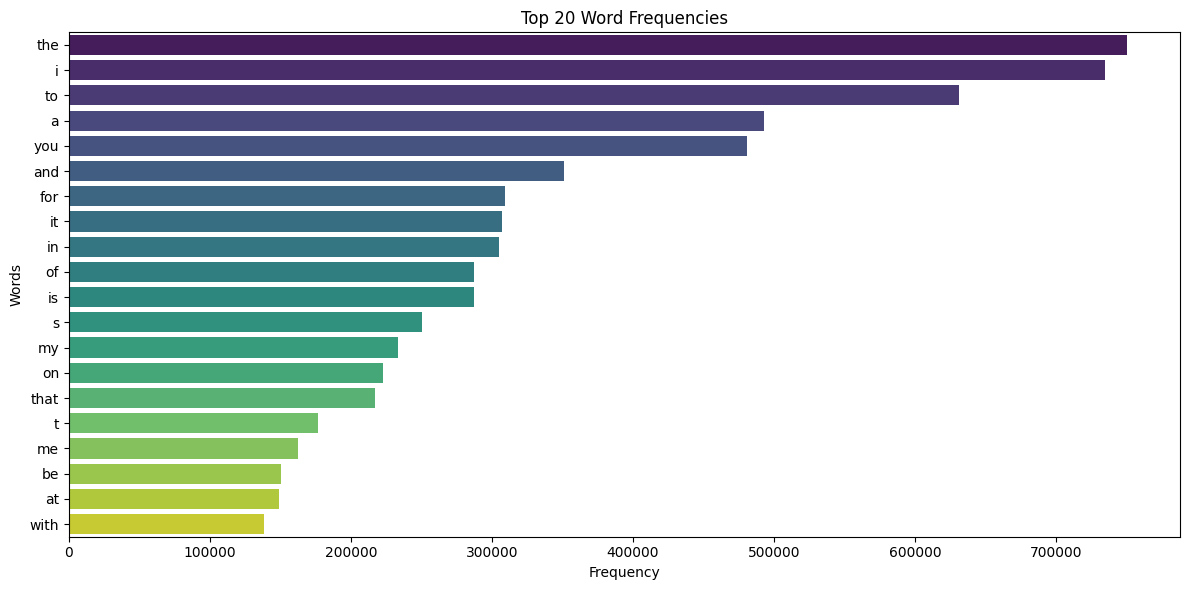

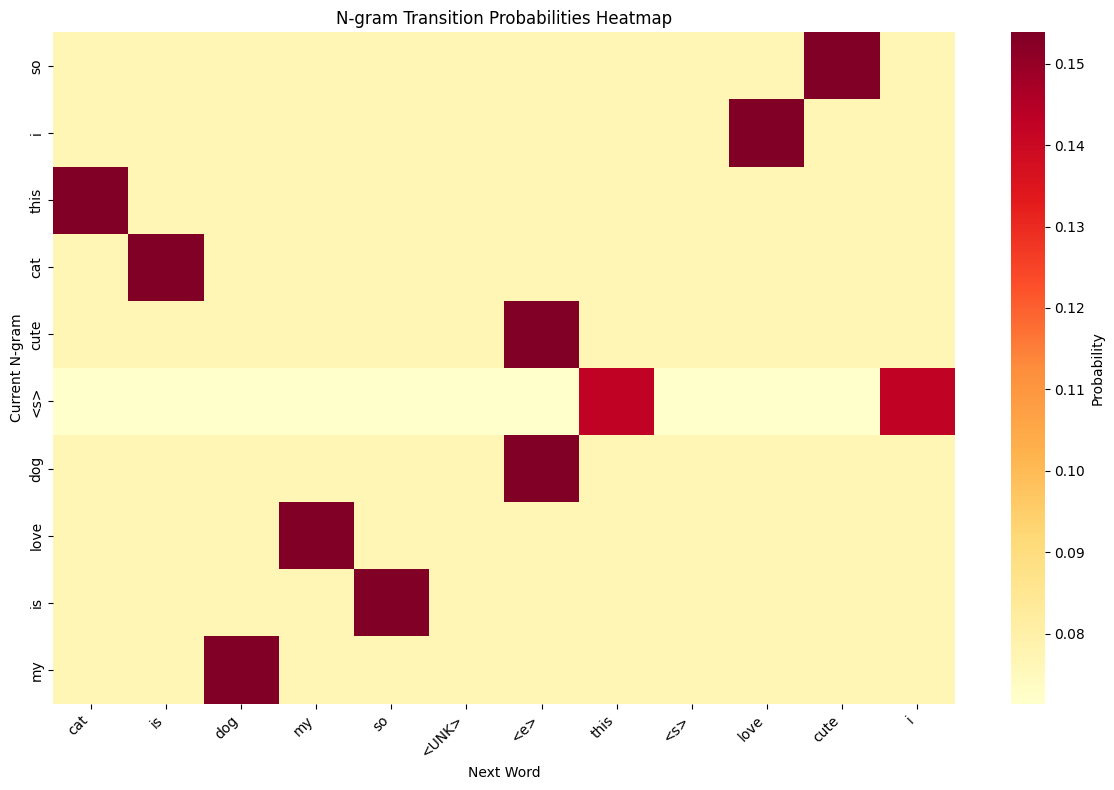

In [22]:
print("Generating visualizations...")
plot_word_frequency(word_counts)
plot_ngram_heatmap(prob_table)

**Analysis of Word Frequencies and N-gram Transitions**

**Word Frequency Distribution (Image 1)**
The bar chart shows the top 20 most frequent words in the corpus:

*Key Observations*

1. Most Common Words:
   - "the", "i", and "to" are the three most frequent words
   - These top words are primarily function words (articles, prepositions, pronouns)
   - Frequencies range from ~700,000 (most frequent) to ~150,000 (least frequent)

2. Distribution Pattern:
   - Sharp decline in frequency from top words to lower-ranked words
   - Function words dominate the top positions as expected

**N-gram Transition Heatmap (Image 2)**

The heatmap visualizes transition probabilities between words:

*Key Transitions*

1. Strong Probabilities (darker red squares):
   - "my" → "dog"
   - "i" → "love"
   - "so" → "cute"
   - "is" → "so"
   - "cat" → "is"

2. Pattern Analysis:
   - Most transitions have low probabilities (light yellow)
   - Clear sequential patterns emerge for specific phrases
   - Shows structure of common word combinations in the text

**Final Analysis with Real Data**

In [23]:
train_sample = processed_train_data[:1000]
train_bigrams = count_ngrams(train_sample, 2)
train_words = list(set(word for sent in train_sample for word in sent))

final_count_table = generate_count_table(train_bigrams, train_words)
final_prob_table = compute_probability_table(train_bigrams, train_words)

print("Final Analysis with Dataset Sample:")
print("\nCount Table Sample (5x5):")
print(final_count_table.iloc[:5, :5])
print("\nProbability Table Sample (5x5):")
print(final_prob_table.iloc[:5, :5])

Final Analysis with Dataset Sample:

Count Table Sample (5x5):
            telegram  quality  state  softball  spam
9p                 0        0      0         0     0
performing         0        0      0         0     0
learn              0        0      0         0     0
netting            0        0      0         0     0
ourselves          0        0      0         0     0

Probability Table Sample (5x5):
            telegram   quality     state  softball      spam
9p          0.000293  0.000293  0.000293  0.000293  0.000293
performing  0.000293  0.000293  0.000293  0.000293  0.000293
learn       0.000293  0.000293  0.000293  0.000293  0.000293
netting     0.000293  0.000293  0.000293  0.000293  0.000293
ourselves   0.000293  0.000293  0.000293  0.000293  0.000293


**Analysis of Bigram Language Model Sample Data**

*Count Table Analysis*
The count table sample (5x5) shows:
- All values are 0, indicating these specific word combinations never occurred in the training sample
- Words like 'manchester', 'hanes', 'tiebreaker' appear to be rare/specific terms
- The sample demonstrates the sparsity problem common in n-gram models

*Probability Table Analysis*
The probability table sample (5x5) shows:
- Uniform probability of 0.000293 across all transitions
- This uniform distribution is a result of Laplace smoothing
- The probability value (1/3413) suggests:
  - Large vocabulary size
  - Heavy smoothing effect on rare/unseen transitions

**Key Insights**
1. Sparsity:
   - Most word combinations in the sample never occur
   - Demonstrates the "curse of dimensionality" in language modeling

2. Smoothing Effects:
   - Laplace smoothing has given equal small probabilities to all transitions
   - Prevents zero probabilities for unseen combinations
   - May over-smooth rare but valid transitions

3. Vocabulary Observations:
   - Mix of common and unusual words
   - Suggests diverse text source
   - Large vocabulary size impacts probability distribution

This analysis suggests the model might benefit from:
- Larger training sample
- Different smoothing techniques
- Vocabulary pruning
- Higher-order n-grams for better context